# Diagrams relating to BinderHub


Some initial sketches of architecture, activity and sequence diagrams relating to BinderHub.

In [1]:
%load_ext blockdiag_magic

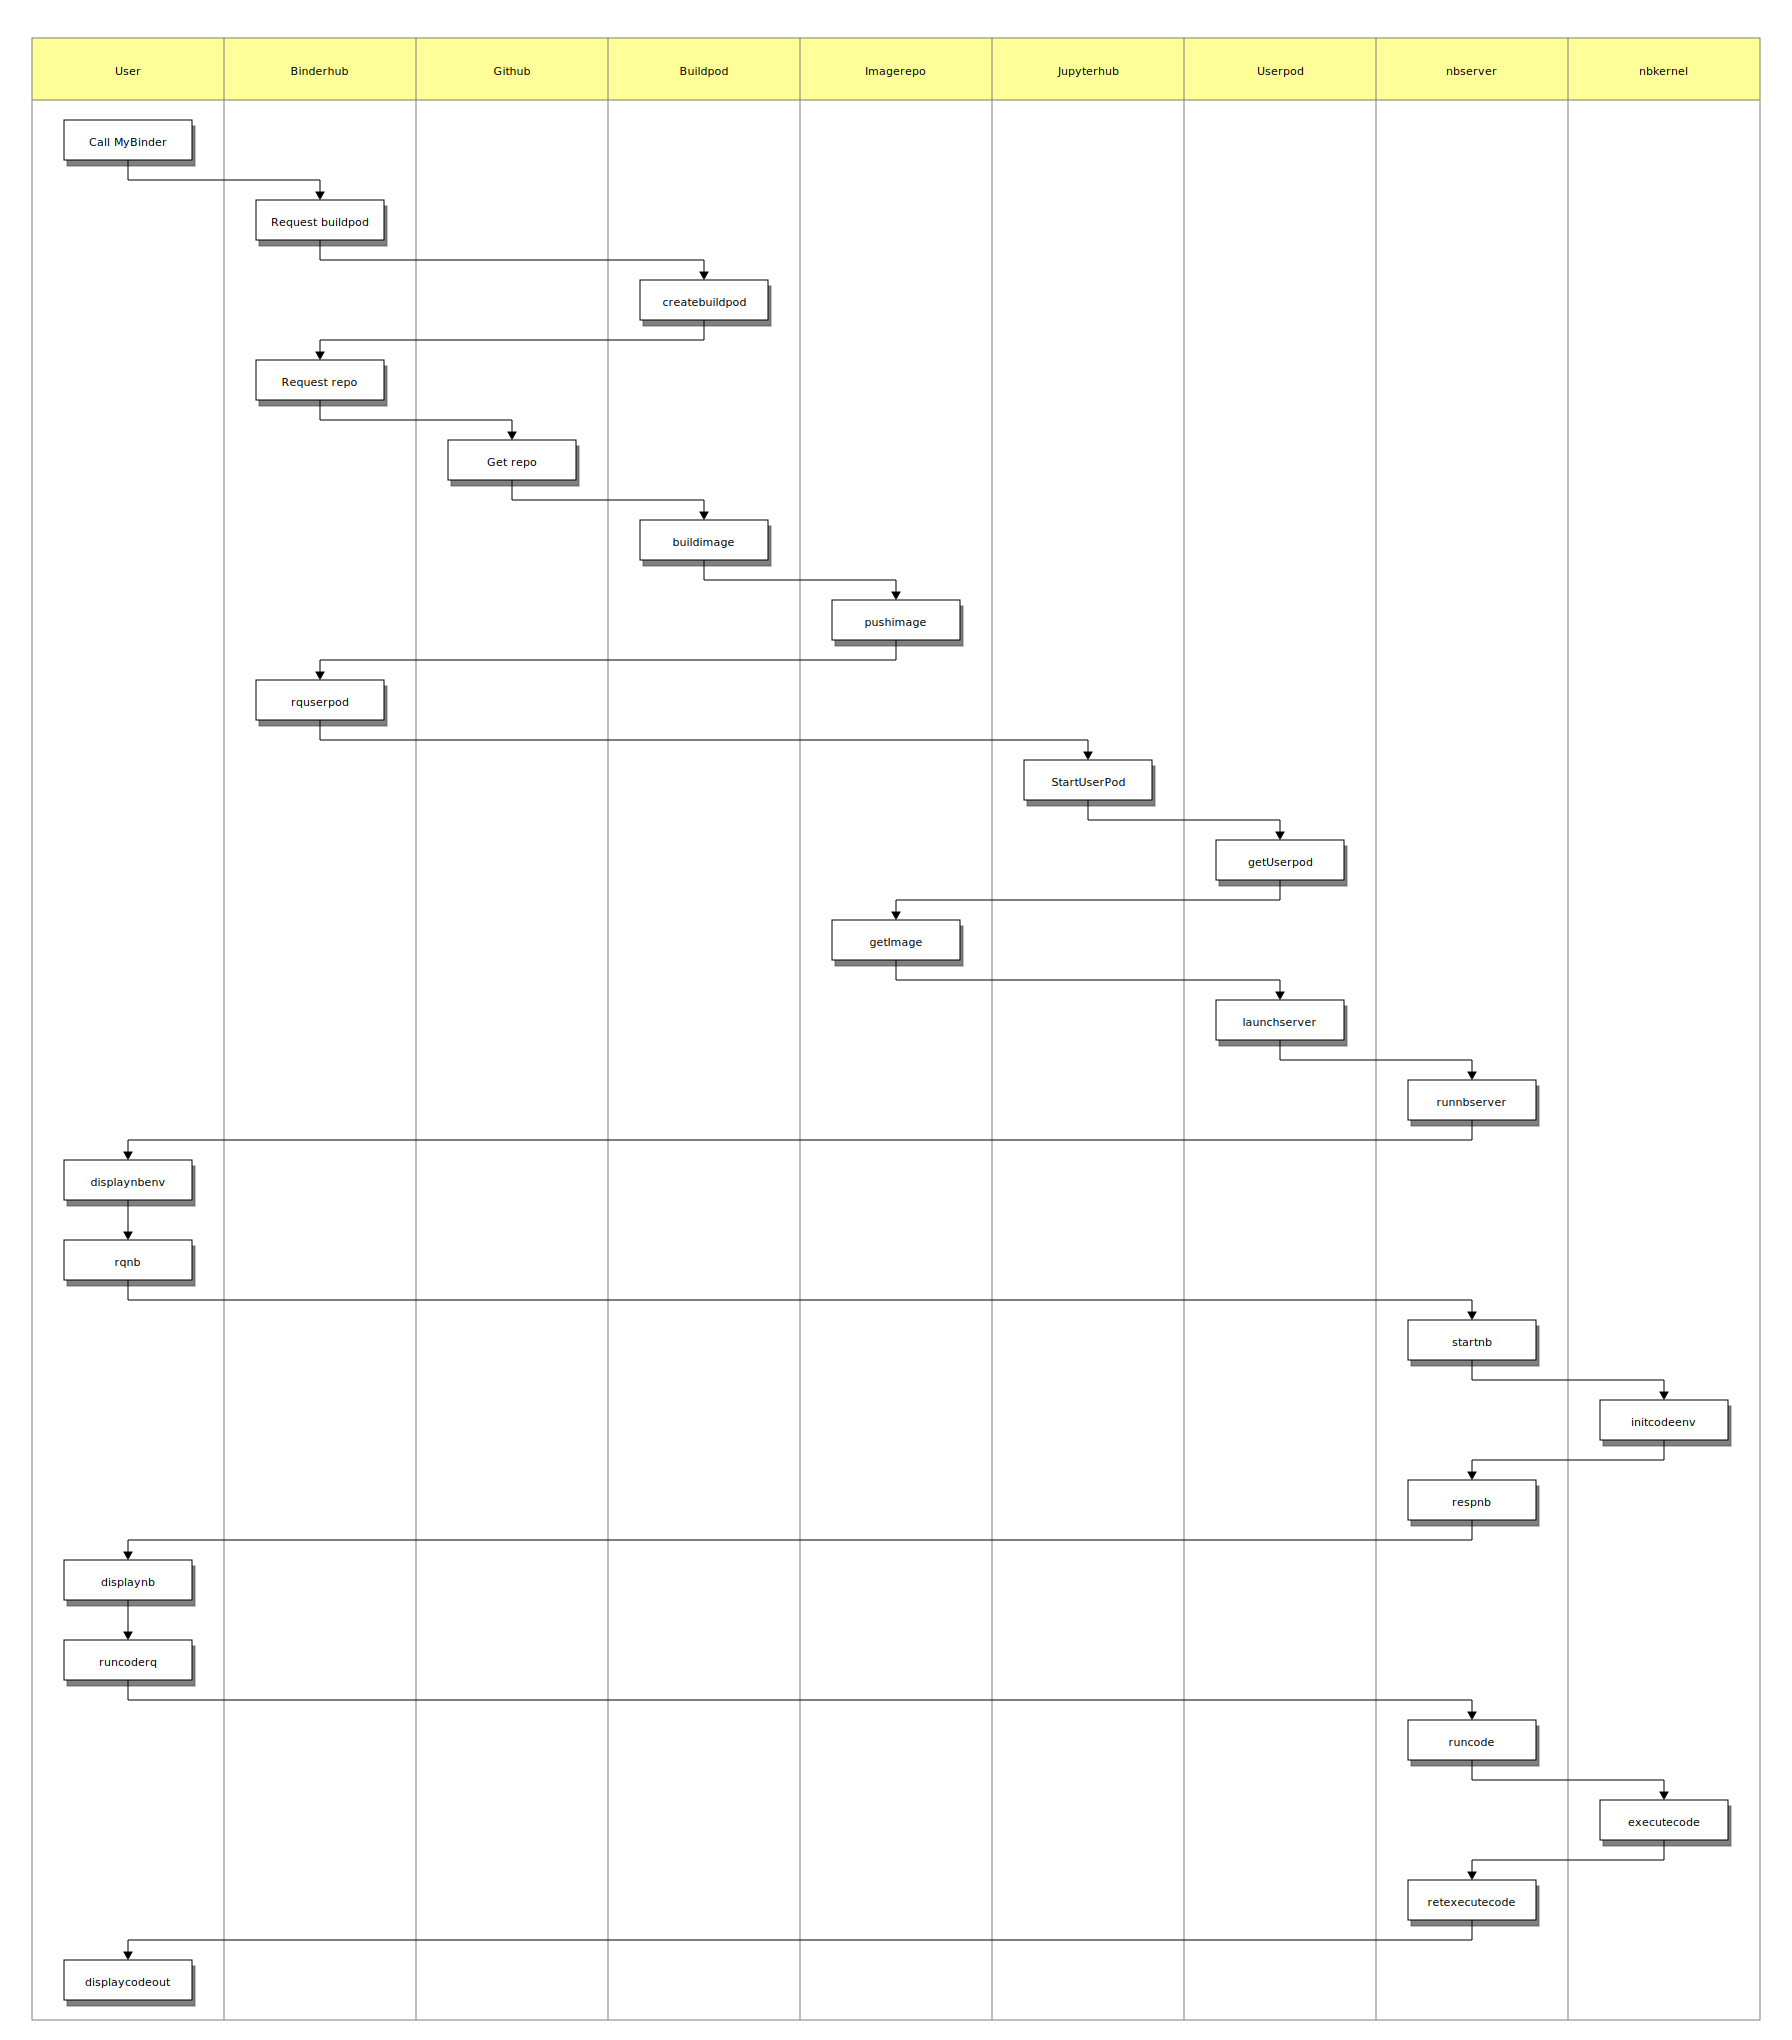

In [2]:
%%actdiag
{
  launch -> rqbuildpod -> createbuildpod -> rqrepo -> gitrepo -> buildimage -> pushimage -> rquserpod -> StartUserPod
  -> getUserpod -> getImage -> launchserver -> runnbserver -> displaynbenv -> rqnb -> startnb -> initcodeenv -> respnb
  -> displaynb -> runcoderq -> runcode -> executecode -> retexecutecode -> displaycodeout

  lane user {
     label = "User"
     launch [label = "Call MyBinder"];
     displaynbenv
     rqnb
     displaynb
     runcoderq
     displaycodeout
  }
  lane Binderhub {
     rqbuildpod [label = "Request buildpod"];
     rqrepo [label = "Request repo"];
      rquserpod;
  }
  lane Github {
    gitrepo [label = "Get repo"]
  }
  lane Buildpod {
    createbuildpod
    buildimage
  }
  lane Imagerepo {
    pushimage
    getImage
  }
  lane Jupyterhub {
    StartUserPod
  }
  lane Userpod {
    getUserpod
    launchserver
  }
  lane nbserver {
      runnbserver
      startnb
      respnb
      runcode
      retexecutecode
  }
  lane nbkernel {
     initcodeenv
     executecode
  }
}

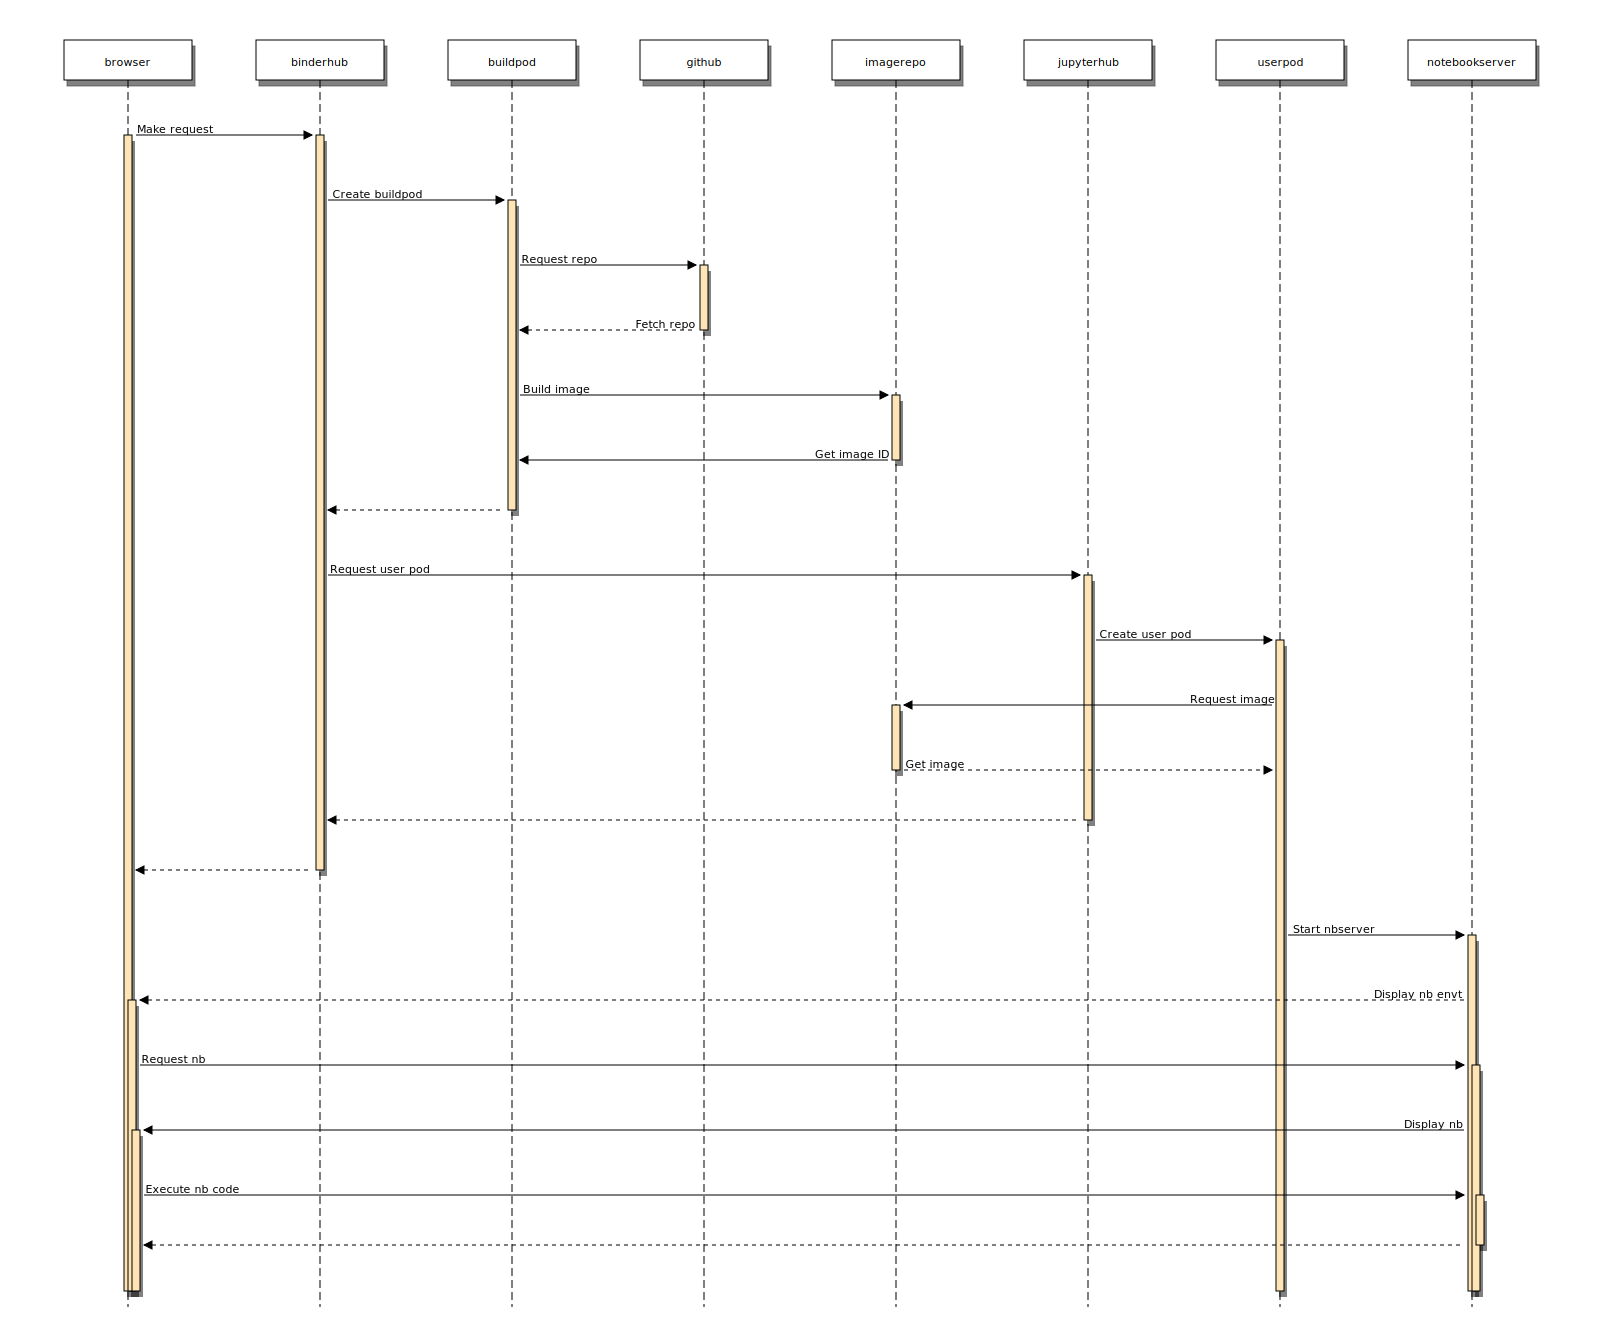

In [5]:
%%seqdiag
{
  // simple notation
  browser  => binderhub [label = "Make request"] {

    binderhub => buildpod [label = "Create buildpod"] {
      buildpod -> github [label = "Request repo"];
      buildpod<-- github [label = "Fetch repo"];
      buildpod -> imagerepo [label = "Build image"];
      buildpod <- imagerepo [label = "Get image ID"];
};
    binderhub => jupyterhub [label = "Request user pod"] {
    jupyterhub -> userpod [label = "Create user pod"];

    userpod -> imagerepo [label = "Request image"];
    userpod <-- imagerepo [label = "Get image"];

};

 }; 
  
userpod -> notebookserver [label = "Start nbserver"]{

notebookserver --> browser [label = "Display nb envt"] {

browser -> notebookserver [label = "Request nb"] ;
notebookserver -> browser [label = "Display nb"] 
{
browser => notebookserver [label = "Execute nb code"]
}
}
}
  
}

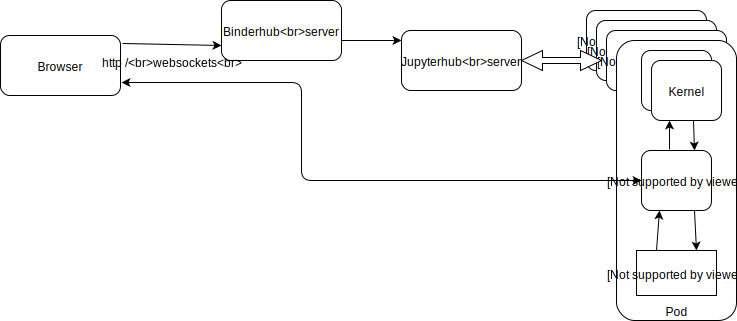

In [9]:
from IPython.display import SVG
SVG('../svg/basic_arch_binder.svg')

#To edit, see also the original drawio file: ../drawio/basic_arch_binder.drawio